# Data Exploration
## Goodreads Books Dataset

In [41]:
import pandas as pd
import numpy as np
import gzip
import json

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [42]:
def load_data(file_name, head = 500):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return pd.DataFrame(data)

In [43]:
# Load samples
books = load_data('data/raw/goodreads_books.json.gz', head=10000)
reviews = load_data('data/raw/goodreads_reviews_dedup.json.gz', head=50000)

In [44]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   isbn                  10001 non-null  object
 1   text_reviews_count    10001 non-null  object
 2   series                10001 non-null  object
 3   country_code          10001 non-null  object
 4   language_code         10001 non-null  object
 5   popular_shelves       10001 non-null  object
 6   asin                  10001 non-null  object
 7   is_ebook              10001 non-null  object
 8   average_rating        10001 non-null  object
 9   kindle_asin           10001 non-null  object
 10  similar_books         10001 non-null  object
 11  description           10001 non-null  object
 12  format                10001 non-null  object
 13  link                  10001 non-null  object
 14  authors               10001 non-null  object
 15  publisher             10001 non-null

-> Only object type columns so we need to format the dataset.\
-> Missing values are not counted because of object type.

In [45]:
books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...


Let's add one columne "popularity rate" to sort our dataset.

In [46]:
popularity_rate = []
for index, row in books.iterrows():
    count = 0
    for cat in row['popular_shelves']:
        count += int(cat['count'])
    popularity_rate.append(count)

books['popularity_rate'] = popularity_rate

books.sort_values(by=['popularity_rate'], ascending=False, inplace=True)

books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series,popularity_rate
3373,9604533940,21,[],US,gre,"[{'count': '834959', 'name': 'to-read'}, {'cou...",,false,4.36,,...,,2008,https://www.goodreads.com/book/show/16281293,https://images.gr-assets.com/books/1354871653m...,16281293,142,878368,Η κλέφτρα των βιβλίων,Η κλέφτρα των βιβλίων,1006161
8096,8917161375,107,[],US,eng,"[{'count': '742446', 'name': 'to-read'}, {'cou...",,false,4.25,B01B173GA6,...,,2006,https://www.goodreads.com/book/show/1555826.Pr...,https://s.gr-assets.com/assets/nophoto/book/11...,1555826,710,3060926,Pride and Prejudice,Pride and Prejudice,997017
2693,3954180154,1,[],US,ger,"[{'count': '742446', 'name': 'to-read'}, {'cou...",,true,4.25,,...,1. Auflage,2012,https://www.goodreads.com/book/show/18000257-s...,https://images.gr-assets.com/books/1369944679m...,18000257,1,3060926,Stolz und Vorurteil,Stolz und Vorurteil,997017
9991,9188877663,5,[167817],US,swe,"[{'count': '525550', 'name': 'to-read'}, {'cou...",,false,4.45,,...,2,2001,https://www.goodreads.com/book/show/6015185-ha...,https://images.gr-assets.com/books/1465566233m...,6015185,96,4640799,"Harry Potter och de vises sten (Harry Potter, #1)","Harry Potter och de vises sten (Harry Potter, #1)",771435
3221,,12,[167817],US,eng,"[{'count': '525550', 'name': 'to-read'}, {'cou...",,true,4.45,,...,US Enhanced Edition,2015,https://www.goodreads.com/book/show/27421523-h...,https://images.gr-assets.com/books/1446575623m...,27421523,80,4640799,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter and the Sorcerer's Stone (Harry P...,771435


In [47]:
#books.to_excel('data/excel/books10k.xlsx', sheet_name='head10k')
#reviews.to_excel('data/excel/reviews50k.xlsx', sheet_name='head50k')

### Data Cleaning And Format

In [48]:
#Set missing values as NULL
books.replace('', np.NaN, inplace=True)

integers = ['text_reviews_count','ratings_count','publication_day','publication_month', 'publication_year','book_id','num_pages']
floats = ['average_rating']

#Change column types
for col in integers:
    books[col] = books[col].fillna(0)
    books[col] = books[col].astype(int)
for col in floats:
    books[col] = books[col].astype(float)

<AxesSubplot:>

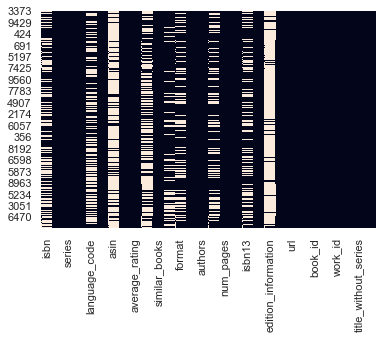

In [49]:
sns.heatmap(books.isnull(), cbar=False)

### Item Dataset Exploration

In [50]:
books.describe()

,text_reviews_count,average_rating,num_pages,publication_day,publication_month,publication_year,book_id,ratings_count,popularity_rate
count,10001.000000,10000.000000,10001.000000,10001.000000,10001.000000,10001.000000,1.000100e+04,10001.000000,1.000100e+04
mean,29.224178,3.865113,174.470453,6.629637,3.942506,1471.697230,1.541280e+07,360.549445,5.083889e+03
std,305.118580,0.527846,187.843148,9.495905,4.113951,886.976893,1.081787e+07,5199.235926,3.440756e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.701000e+03,0.000000,0.000000e+00
25%,2.000000,3.640000,0.000000,0.000000,0.000000,0.000000,6.051161e+06,6.000000,3.100000e+01
50%,4.000000,3.910000,152.000000,1.000000,3.000000,2007.000000,1.584313e+07,21.000000,1.850000e+02
75%,12.000000,4.160000,289.000000,12.000000,8.000000,2013.000000,2.458172e+07,79.000000,1.034000e+03
max,23413.000000,5.000000,3520.000000,31.000000,12.000000,2019.000000,3.645183e+07,416634.000000,1.006161e+06


#### 1. Ratings and reviews

(0.0, 200.0)

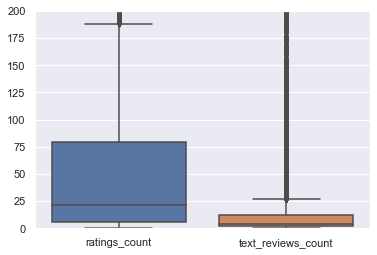

In [51]:
ax = sns.boxplot(data=books[["ratings_count","text_reviews_count"]])
ax.set_ylim(0,200)

### 2. Categories

-> Language

In [52]:
lang = books["language_code"].value_counts().sort_values(ascending=False)
#Display top 20 languages represented
lang.head(10)

eng      3050
en-US     402
spa       235
ita       221
en-GB     218
ara       156
fre       126
ger       124
por       121
ind       115
Name: language_code, dtype: int64

#### a. Books categories

In [53]:
all_categories = {}
for row in books['popular_shelves'].tolist():
    if row:
        for cat in row:
            if cat['name'] not in all_categories.keys():
                all_categories[cat['name']] = int(cat['count'])
            else:
                all_categories[cat['name']] += int(cat['count'])
print(len(all_categories))

115855


About 120000 categories are represented.\
Some of them might be underepresented, overrepresented or just unrelevent.\
-> We need to choose which one we will consider as features.

In [54]:
categories = pd.DataFrame({}, columns=['name', 'counts'])

categories['name'] = all_categories.keys()
categories['counts'] = all_categories.values()
categories.sort_values(by=['counts'], inplace=True, ascending=False)

In [55]:
#Print the top 10 categories
categories.head(10)

,name,counts
0,to-read,33993263
1,currently-reading,2199576
2,favorites,1309447
15,classics,1071108
4,fiction,1034803
34,fantasy,796818
5,young-adult,375081
6,books-i-own,348920
11,owned,311782
100,romance,227571


One can see that some categories like "currently-reading", "owned", "books-i-own" aren't really describing the books.\
But let's keep it for the moment.


In [56]:
#Print the bottom 10 categories
categories.tail(10)

,name,counts
65386,scan-66,1
24794,valerie-s-books,1
65372,9-vancouver,1
65379,last-fling-summer,1
24796,4-star-old,1
65377,ebooks-1-100,1
65375,funny-strong-females,1
24798,pmaw-backup,1
65373,own-but-never-read,1
115854,inspirerende,1


One can see that there are lots of noises among the categories.\
Those ones are unrelevent, too specifics or just mistakes.\
-> We need to remove them from the dataset since it can't be a source of informations.

In [57]:
categories['counts'].describe()

count    1.158550e+05
mean     4.388587e+02
std      1.003143e+05
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.399326e+07
Name: counts, dtype: float64

One can see that at least 75% of those categories are represented less than twice.\
It means that we can already eliminate those one.

In [58]:
#Let's continue with the top 25%
categories = categories.head(int(round(len(categories)*25/1000, 0)))


print(len(categories))
categories.describe()

2896


,counts
count,2.896000e+03
mean,1.742348e+04
std,6.343579e+05
min,8.600000e+01
25%,1.390000e+02
50%,2.925000e+02
75%,9.685000e+02
max,3.399326e+07


In [59]:
#Print the bottom 10 categories
categories.tail(10)

,name,counts
2408,2012-read,86
7899,bdb,86
6447,dennis-lehane,86
5865,ward-jr,86
15341,sigma-force,86
2622,newbery-winner,86
2862,spy-thrillers,86
5952,banks-maya,86
1471,ensayo,86
1681,science-and-nature,86


In [60]:
linked = []
for cat in categories['name']:
    if 'romance' in cat.lower():
        linked.append(cat)
print(len(linked))
print(linked)

56
['romance', 'historical-romance', 'paranormal-romance', 'contemporary-romance', 'erotic-romance', 'm-m-romance', 'adult-romance', 'ya-romance', 'romance-historical', 'regency-romance', 'romance-contemporary', 'mm-romance', 'college-romance', 'dark-romance', 'romance-paranormal', 'fantasy-romance', 'sports-romance', 'new-adult-romance', 'gay-romance', 'romance-suspense', 'romance-novels', 'historical-romances', 'second-chance-romance', 'clean-romance', 'genre-romance', 'vampire-romance', 'teen-romance', 'romance-regency', 'historic-romance', 'romance-erotica', 'romances', 'military-romance', 'christian-romance', 'young-adult-romance', 'mc-romance', 'office-romance', 'suspense-romance', 'western-romance', 'sci-fi-romance', 'highland-romance', 'gothic-romance', 'genre-historical-romance', 'contemp-romance', 'historicalromance', 'biker-romance', 'scottish-romance', 'highlander-romance', 'sweet-romance', 'fiction-romance', 'to-read-romance', 'medieval-romance', 'high-school-romance', 'fu

One can see that many categories are too specific and contains sub-categories that a more represented. (exemple: Romance)\
We need to separate those categories.

Let's try to:\
-> remove duplicates (like "sci-fi" and "science-fiction")\
-> remove plurales (like "childrenS")\
-> remove categories that give informations we already have in the dataset. (like "series" or "ebook")\
-> remove non categorical labels (like "favorite", "books-iown" etc.)

In [61]:
selected_cat = categories['name'].tolist()[:50]

print(selected_cat)

['to-read', 'currently-reading', 'favorites', 'classics', 'fiction', 'fantasy', 'young-adult', 'books-i-own', 'owned', 'romance', 'historical-fiction', 'classic', 'ya', 'mystery', 'science-fiction', 'favourites', 'non-fiction', 'series', 'kindle', 'sci-fi', 'owned-books', 'literature', 'horror', 'book-club', 'contemporary', 'library', 'default', 'novels', 'to-buy', 'audiobook', 'adventure', 'childrens', 'historical', 'adult', 'audiobooks', 'paranormal', 'ebook', 'thriller', 'my-books', 'nonfiction', 'history', 'dystopia', 'audio', 'children', 'school', 'philosophy', 'ebooks', 'dystopian', 'i-own', 'my-library']


In [62]:
to_remove = ['to-read', 'currently-reading', 'favorites', 'books-i-own', 'owned', 'favourites', 'series',
            'non-fiction', 'library', 'default','to-buy', 'childrens', 'ya', 'ebooks', 'dystopian', 'audiobooks',
            'ebook','my-books','nonfiction' ,'audiobook','i-own', 'my-library','owned-books','owned-books',
            'science-fiction', 'historical-fiction','novels','classics','young-adult','book-club']

for cat in to_remove:
    try:
        selected_cat.remove(cat)
    except ValueError:
        pass

selected_cat.append('novel')
selected_cat.append('young')

print(selected_cat)

['fiction', 'fantasy', 'romance', 'classic', 'mystery', 'kindle', 'sci-fi', 'literature', 'horror', 'contemporary', 'adventure', 'historical', 'adult', 'paranormal', 'thriller', 'history', 'dystopia', 'audio', 'children', 'school', 'philosophy', 'novel', 'young']


Now not to loose information because of noise, we need to associate a lexical field to those categories.\
We will then look for similarities among the rest of the dataset to classify better the books. 

In [63]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stem_categories = {}

for cat in selected_cat:
    stem_categories[ps.stem(cat)] = cat

print(stem_categories)

{'fiction': 'fiction', 'fantasi': 'fantasy', 'romanc': 'romance', 'classic': 'classic', 'mysteri': 'mystery', 'kindl': 'kindle', 'sci-fi': 'sci-fi', 'literatur': 'literature', 'horror': 'horror', 'contemporari': 'contemporary', 'adventur': 'adventure', 'histor': 'historical', 'adult': 'adult', 'paranorm': 'paranormal', 'thriller': 'thriller', 'histori': 'history', 'dystopia': 'dystopia', 'audio': 'audio', 'children': 'children', 'school': 'school', 'philosophi': 'philosophy', 'novel': 'novel', 'young': 'young'}


#### b. Publisher

In [64]:
publisher_count = books['publisher'].value_counts().sort_values(ascending=False)
print(len(publisher_count))
publisher_count.head(15)

3980


Createspace Independent Publishing Platform    61
Smashwords Edition                             46
Harlequin                                      44
Createspace                                    40
HarperCollins                                  38
Pocket Books                                   30
Vintage                                        29
HMH Books for Young Readers                    28
Bantam                                         27
Marvel                                         26
Ballantine Books                               26
Berkley                                        26
Gramedia Pustaka Utama                         26
Amazon Digital Services                        26
Random House Audio                             23
Name: publisher, dtype: int64

There are too many different publishers to create features like we did for books categories.
Furthemore, publisher frequencies aren't that high.

-> Let's keep the column like that. We will then create a feature telling if it is the same publisher depending on the book we are comparing.

-> We'll do the same for "Author".

In [65]:
author = books['authors'].apply(lambda x : 0 if not x else x[0]['author_id'])
author.head()

3373      11466
8096       1265
2693       1265
9991    1077326
3221    1077326
Name: authors, dtype: object

#### c. Date

We will use only the column "Year" to compare books between them.

In [66]:
publication_year = books['publication_year'].replace(0, np.nan)

In [67]:
missing_year = round(publication_year.isna().sum()/len(publication_year)*100, 2)
print( f"{missing_year}% of the values are missing.")

26.58% of the values are missing.


In [68]:
publication_year.describe()

count    7343.000000
mean     2004.418358
std        60.025883
min        10.000000
25%      2004.000000
50%      2011.000000
75%      2014.000000
max      2019.000000
Name: publication_year, dtype: float64

In [69]:
publication_year.where(publication_year != np.NaN).sort_values().head(10)

8465      10.0
2318      14.0
5315      20.0
8561     162.0
7398     195.0
4929     206.0
9876    1371.0
9513    1385.0
8802    1387.0
6816    1388.0
Name: publication_year, dtype: float64

Since that at least 75% of the books as been published after 2004, we can consider those values as outliers.

-> Let's set the minimum publication year as 1960.\
-> We will bring together all the values bellow this date to 1960.

Concerning the missing values, we could :
1. Assign them the average publication year value.
2. Set them as the minimum (1960).

-> At first, we'll choose the second option to avoid giving to this feature to much importance.

In [70]:
publication_year.fillna(0, inplace=True)
publication_year[publication_year < 1960] = 1960
publication_year.head()

3373    2008.0
8096    2006.0
2693    2012.0
9991    2001.0
3221    2015.0
Name: publication_year, dtype: float64

In [71]:
# MinMax Normalization
publication_year = (publication_year - publication_year.min())/(publication_year.max()-publication_year.min())
publication_year.head()

3373    0.813559
8096    0.779661
2693    0.881356
9991    0.694915
3221    0.932203
Name: publication_year, dtype: float64

#### d. Format

In [72]:
format_count = books['format'].value_counts().sort_values(ascending=False)
print(len(format_count))
format_count.head(10)

65


Paperback                3683
Hardcover                1513
ebook                     799
Kindle Edition            499
Mass Market Paperback     188
Audio CD                  121
Audiobook                  87
Audible Audio              47
Audio                      42
Unknown Binding            25
Name: format, dtype: int64

In [73]:
top_format = ['Paperback', 'Hardcover', 'ebook', 'Kindle Edition', 'Mass Market Paperback', 'Audiobook']
book_format = books['format']
book_format.fillna('Undefined', inplace=True)
book_format.replace('ebook','Ebook', inplace=True)
book_format = book_format.apply(lambda x : 'Audiobook' if 'Aud' in x else x)
book_format = book_format.apply(lambda x : 'Other' if x not in top_format and x != 'Undefined' else x)

book_format.head(5)

3373    Paperback
8096    Paperback
2693        Other
9991    Hardcover
3221        Other
Name: format, dtype: object

In [74]:
book_format.value_counts().sort_values(ascending=False)

Paperback                3683
Undefined                2872
Hardcover                1513
Other                     946
Kindle Edition            499
Audiobook                 300
Mass Market Paperback     188
Name: format, dtype: int64

#### e. Series

In [75]:
books['series'].head()

3373          []
8096          []
2693          []
9991    [167817]
3221    [167817]
Name: series, dtype: object

In [76]:
is_series = books['series'].apply(lambda x: int(bool((x))))
is_series.head()

3373    0
8096    0
2693    0
9991    1
3221    1
Name: series, dtype: int64

## 3. Sampling for Content Base Filtering

Now let's create a new dataset containing the most important columns to compare books.

It may include:\
-> Categories (most important one)\
-> Author\
-> Publisher\
-> Date\
-> Format\
-> Is it a serie of books ?\
-> ... ?

In [80]:
features = pd.DataFrame({}, columns=['book_id']+selected_cat)

#Let's create a column for each categories
#Those columns will contain the percentage of counts
for index, row in books.iterrows():
    new_row = [0]*len(selected_cat)
    for cat in row['popular_shelves']:
        for key, value in stem_categories.items():
            if value == cat['name']:
                new_row[selected_cat.index(value)] = int(cat['count'])
            elif key in cat['name']:
                new_row[selected_cat.index(value)] = int(cat['count'])
            

    sum_count = 0
    for value in new_row:
        sum_count += value
    
    new_row = [x/sum_count if sum_count != 0 else x for x in new_row]
    
    new_row.insert(0, row['book_id'])

    features.loc[len(features)] = new_row

features['book_id'] = features['book_id'].astype(int)

features.head()

,book_id,fiction,fantasy,romance,classic,mystery,kindle,sci-fi,literature,horror,...,paranormal,thriller,history,dystopia,audio,children,school,philosophy,novel,young
0,16281293,0.034086,0.085290,0.000000,0.039539,0.00000,0.120588,0.000000,0.065596,0.0,...,0.000000,0.0,0.165278,0.0,0.035449,0.000000,0.058022,0.0,0.047569,0.050901
1,1555826,0.050844,0.000000,0.196248,0.059287,0.00000,0.230394,0.000000,0.069418,0.0,...,0.000000,0.0,0.043715,0.0,0.061914,0.000000,0.047655,0.0,0.112758,0.042026
2,18000257,0.050844,0.000000,0.196248,0.059287,0.00000,0.230394,0.000000,0.069418,0.0,...,0.000000,0.0,0.043715,0.0,0.061914,0.000000,0.047655,0.0,0.112758,0.042026
3,6015185,0.006399,0.835114,0.000000,0.007895,0.01149,0.009323,0.016117,0.008033,0.0,...,0.015979,0.0,0.000000,0.0,0.006330,0.007328,0.000000,0.0,0.010097,0.008394
4,27421523,0.006399,0.835114,0.000000,0.007895,0.01149,0.009323,0.016117,0.008033,0.0,...,0.015979,0.0,0.000000,0.0,0.006330,0.007328,0.000000,0.0,0.010097,0.008394


We need to check that the big majority of the books is well categories.

In [81]:
nb_nocat = 0
for index, row in features.iterrows():
    for col in features.columns.tolist()[1:]:
        if row[col] != 0:
            break
    else:
        nb_nocat += 1

print(f"{round(nb_nocat/len(features)*100,2)}% of the books are not categorised.")

14.81% of the books are not categorised.


So we can see that a big majority of the books are well categorized.\
However, 15% is still a signifcant part and we might be able to improve that later.

For the moment, let's keep going with those categories.

In [ ]:
#Add the last features
features['author'] = author
features['publisher'] = books['publisher']
features['year'] = publication_year
features['format'] = book_format
features['is_series'] = is_series

features.head()

,book_id,fiction,fantasy,romance,classic,mystery,kindle,sci-fi,literature,horror,...,children,school,philosophy,novel,young,author,publisher,year,format,is_series
0,16281293,0.028861,0.0,0.000000,0.033479,0.0,0.102104,0.000000,0.055541,0.0,...,0.000000,0.049128,0.0,0.040277,0.043099,604031,St. Martin's Press,0.406780,Paperback,0
1,1555826,0.044115,0.0,0.170275,0.051441,0.0,0.199902,0.000000,0.060231,0.0,...,0.000000,0.041348,0.0,0.097835,0.036464,626222,Simon & Schuster Audio,0.694915,Audiobook,0
2,18000257,0.044115,0.0,0.170275,0.051441,0.0,0.199902,0.000000,0.060231,0.0,...,0.000000,0.041348,0.0,0.097835,0.036464,10333,"Nelson Doubleday, Inc.",0.457627,Hardcover,1
3,6015185,0.043652,0.0,0.000000,0.053861,0.0,0.063600,0.109951,0.054799,0.0,...,0.049988,0.000000,0.0,0.068881,0.057264,9212,Atria Books,0.830508,Hardcover,0
4,27421523,0.043652,0.0,0.000000,0.053861,0.0,0.063600,0.109951,0.054799,0.0,...,0.049988,0.000000,0.0,0.068881,0.057264,149918,NaN,0.000000,Undefined,0


Now, we have a clean dataset we can start working with for a "Content Based Filtering" approach.

In [ ]:
#Export in the processed dataset in csv
features.to_csv('data/sample/item_item_filter.csv', index=False)